# Milestone 2 - Hypothesis Simulation 

## Author - Tariq Ayub



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [2]:
# Import libraries
import pandas as pd
#saving the file into pandas dataframe
auto = pd.read_csv(fileName)

In [3]:
auto.columns = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
#dropping column with several missing values
del auto['normalized-losses']

In [11]:
#replacing missing values with NaN
auto = auto.replace(to_replace= '?', value = float("NaN"))

In [128]:
#evaluating NaN
autodata.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
#removing rows with NaN 
autodata = auto.dropna(axis=0)

In [69]:
autodata.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [20]:
#reinding after dropping na
autodata.reset_index()

,index,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,3,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,4,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,5,2,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,6,1,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,7,1,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,10,2,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


In [21]:
#converting data type to int
autodata.loc[:, "price"] = autodata.loc[:, "price"].astype(int)

In [23]:
import pandas
import numpy
from matplotlib import pyplot
import seaborn
import statsmodels.api as sm
import scipy

%matplotlib inline

In [30]:
#price data 
price = autodata.loc[:,'price']

In [37]:
enginesize = autodata.loc[:,'engine-size']
highwaympg = autodata.loc[:,'highway-mpg']
citympg = autodata.loc[:,'city-mpg']

In [32]:
#converting dataframe to array
price = numpy.array(price)

In [39]:
#converting dataframe to array
enginesize = numpy.array(enginesize)
highwaympg = numpy.array(highwaympg)
citympg = numpy.array(citympg)

In [34]:
type(price)

numpy.ndarray

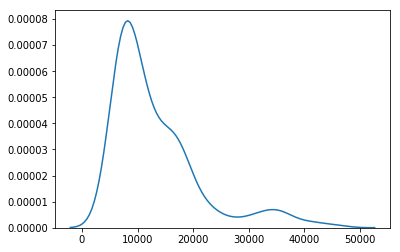

In [42]:
seaborn.kdeplot(price)

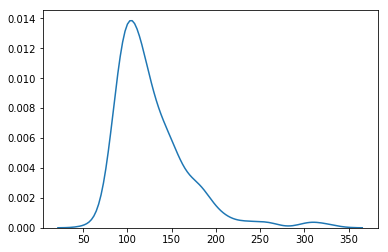

In [43]:
seaborn.kdeplot(enginesize)

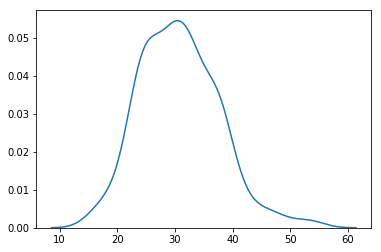

In [45]:
seaborn.kdeplot(highwaympg)


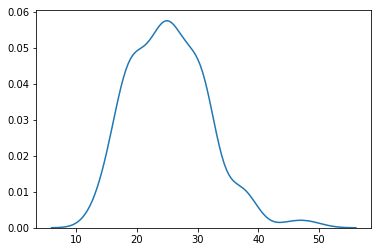

In [46]:
seaborn.kdeplot(citympg)

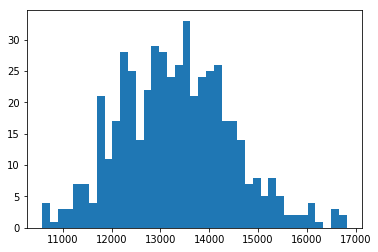

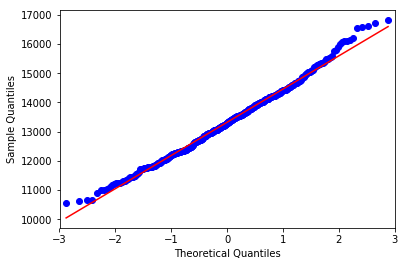

In [49]:
x_means = numpy.array([
        numpy.random.choice(price, size=50, replace=True).mean()
        for i in range(500)])

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s')

In [47]:
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (pop_std, x.std()))

Estimated mean (13259.265) vs actual mean (1.521)
Estimated s.d. (1130.250) vs actual s.d. (1.688)


In [48]:
alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 2215.25
The actual mean is 1.52
The 0.95 level CI is (11044.02 , 15474.52)


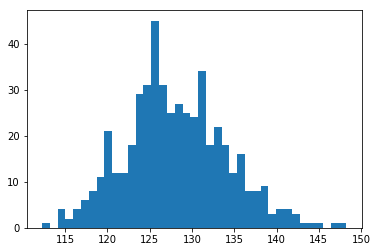

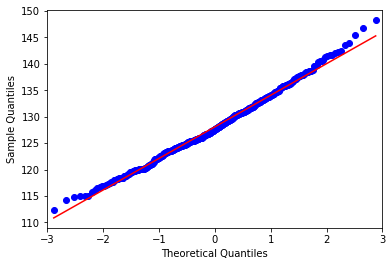

In [50]:
#sampling for engine size
x_means = numpy.array([
        numpy.random.choice(enginesize, size=50, replace=True).mean()
        for i in range(500)])

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s')

In [51]:
#Estimated vs actual for engine size
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (pop_std, x.std()))

Estimated mean (128.066) vs actual mean (1.521)
Estimated s.d. (5.986) vs actual s.d. (1.688)


In [52]:
#values within 2 sigma confidence interval for engine size
alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 11.73
The actual mean is 1.52
The 0.95 level CI is (116.33 , 139.80)


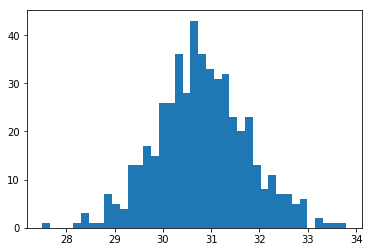

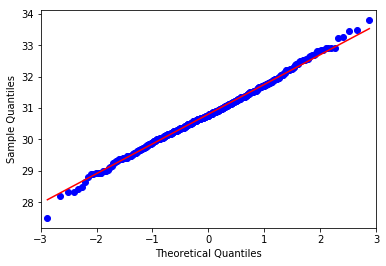

In [53]:
#sampling for highway mpg
x_means = numpy.array([
        numpy.random.choice(highwaympg, size=50, replace=True).mean()
        for i in range(500)])

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s')

In [54]:
#estimated vs actual for highwaympg
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (pop_std, x.std()))

Estimated mean (30.806) vs actual mean (1.521)
Estimated s.d. (0.947) vs actual s.d. (1.688)


In [55]:
#values within 2 sigma confidence interval for highwaympg
alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 1.86
The actual mean is 1.52
The 0.95 level CI is (28.95 , 32.66)


In [56]:
#Bootstrap method 

import pandas
import numpy
from matplotlib import pyplot
import seaborn

%matplotlib inline

In [77]:
autodata.loc[:,'num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [82]:
# seperating data for 2 & 4 door types
doors2 = autodata[autodata['num-of-doors'] == 'two']
doors4 = autodata[autodata['num-of-doors'] == 'four']


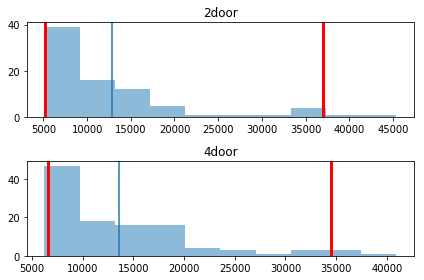

In [83]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    pyplot.hist(x, alpha=.5)
    pyplot.axvline(x.mean())
    # 95% confidence interval    
    pyplot.axvline(numpy.percentile(x, p/2.), color='red', linewidth=3)
    pyplot.axvline(numpy.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pandas.concat([a, b])
    breaks = numpy.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    pyplot.subplot(2, 1, 1)
    plot_hist(a)
    pyplot.title(a_label)
    
    pyplot.subplot(2, 1, 2)
    plot_hist(b)
    pyplot.title(b_label)
    
    pyplot.tight_layout()
    

plot_dists(doors2.price, doors4.price, 20, a_label='2door', b_label='4door')

In [ ]:
#the prices of 2door and 4 door overlap a lot and the mean is almost the same

In [85]:
#using pandas built in bootstrap samples
doors2.sample(frac=1, replace=True).head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
136,3,saab,gas,turbo,two,hatchback,fwd,front,99.1,186.6,...,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18150
89,1,nissan,gas,std,two,sedan,fwd,front,94.5,165.3,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499
189,3,volkswagen,gas,std,two,convertible,fwd,front,94.5,159.3,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
78,2,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6669
104,3,nissan,gas,std,two,hatchback,rwd,front,91.3,170.7,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199


In [86]:
#taking mean of the bootstrap sample
doors2.sample(frac=1, replace=True).price.mean()

13581.061728395061

In [87]:
doors4.sample(frac=1, replace=True).head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
71,-1,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,202.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184
115,0,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,16630
143,0,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,...,108,mpfi,3.62,2.64,9.0,94,5200,26,32,9960
148,0,subaru,gas,std,four,wagon,4wd,front,96.9,173.6,...,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013
86,1,mitsubishi,gas,std,four,sedan,fwd,front,96.3,172.4,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8189


In [88]:
doors4.sample(frac=1, replace=True).price.mean()

14636.714285714286

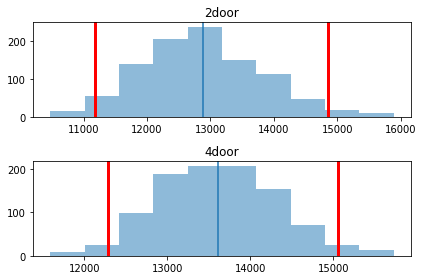

In [89]:
n_replicas = 1000

doors2_bootstrap_means = pandas.Series([
    doors2.sample(frac=1, replace=True).price.mean()
    for i in range(n_replicas)])

doors4_bootstrap_means = pandas.Series([
        doors4.sample(frac=1, replace=True).price.mean()
        for i in range(n_replicas)])

plot_dists(doors2_bootstrap_means, doors4_bootstrap_means, 
           nbins=80, a_label='2door', b_label='4door')

In [90]:
#the distribution of the boorstap mean do not overlap

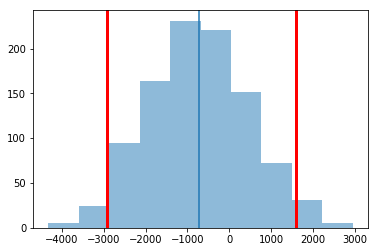

In [95]:
diffs = []
for i in range(n_replicas):
    sample = autodata.sample(frac=1.0, replace=True)
    door2_sample_mean = sample[sample['num-of-doors'] == 'two'].price.mean()
    door4_sample_mean = sample[sample['num-of-doors'] == 'four'].price.mean()
    diffs.append(door2_sample_mean - door4_sample_mean)
diffs = pandas.Series(diffs)

plot_hist(diffs)

In [ ]:
#the price of mean difference is not zero but is not significantly different 
#as it we can see 0 inside the confidence interval 

In [144]:
#preparing data for Bayes model
cleanup_nums =  {"four": 1, "two": 0}

In [145]:
print(cleanup_nums)

{'four': 1, 'two': 0}


In [146]:
newautodata = autodata.replace({"num-of-doors": cleanup_nums})

In [147]:
doors = newautodata.loc[:, 'num-of-doors']

In [148]:
#converting dataframe to array
doortypes = numpy.array(doors)

In [163]:
numpy.unique(doortypes, return_counts=True)

(array([0, 1], dtype=int64), array([ 81, 112], dtype=int64))

In [171]:
N = len(doortypes)  # sample size
n_doortypes = sum(doortypes)  # number 4 door
n_not = N - n_doortypes # number 2 door
print('4 door = %d 2 door = %d'
    '\nProbability of 4 door vehicle = %.1f' 
      % (n_doortypes, n_not, n_doortypes / (n_doortypes + n_not)))

4 door = 112 2 door = 81
Probability of 4 door vehicle = 0.6


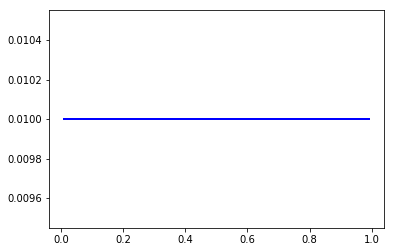

In [172]:
N = 100
p = numpy.linspace(.01, .99, num=N)
pp = [1./N] * N
pyplot.plot(p, pp, linewidth=2, color='blue')

Text(0, 0.5, 'Likelihood')

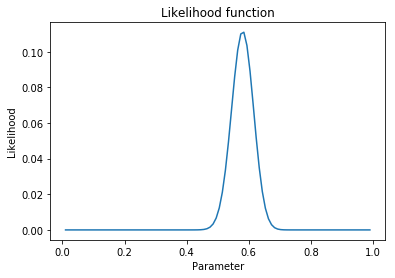

In [173]:
def likelihood(p, data):
    k = sum(data)
    N = len(data)
    # Compute Binomial likelihood
    l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k)
    # Normalize the likelihood to sum to unity
    return l/sum(l)

l = likelihood(p, doortypes)
pyplot.plot(p, l)
pyplot.title('Likelihood function')
pyplot.xlabel('Parameter')
pyplot.ylabel('Likelihood')

In [174]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

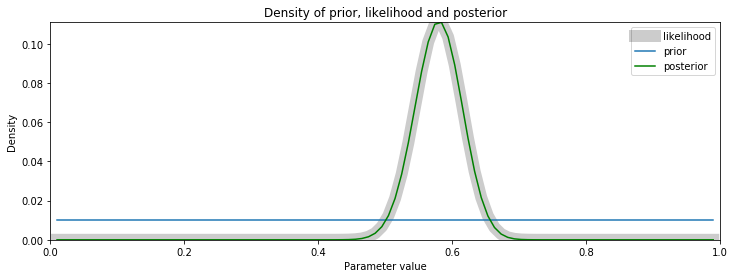

In [175]:
def plot_post(prior, like, post, x):
    maxy = max(max(prior), max(like), max(post))
    pyplot.figure(figsize=(12, 4))
    pyplot.plot(x, like, label='likelihood', linewidth=12, color='black', alpha=.2)
    pyplot.plot(x, prior, label='prior')
    pyplot.plot(x, post, label='posterior', color='green')
    pyplot.ylim(0, maxy)
    pyplot.xlim(0, 1)
    pyplot.title('Density of prior, likelihood and posterior')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.legend()
    
post = posterior(pp, l)
plot_post(pp, l, post, p)

In [176]:
print('Maximum of the prior density = %.3f' % max(pp))
print('Maximum likelihood = %.3f' % max(l))
print('MAP = %.3f' % max(post))

Maximum of the prior density = 0.010
Maximum likelihood = 0.111
MAP = 0.111


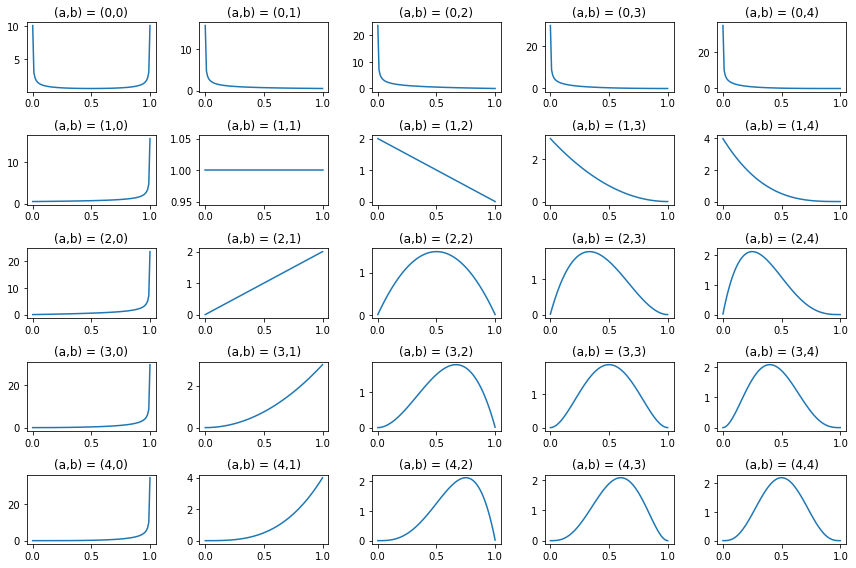

In [178]:
import itertools

pyplot.figure(figsize=(12, 8))

alpha = [.5, 1, 2, 3, 4]
beta = alpha[:]
x = numpy.linspace(.001, .999, num=100)

for i, (a, b) in enumerate(itertools.product(alpha, beta)):
    pyplot.subplot(len(alpha), len(beta), i+1)
    pyplot.plot(x, scipy.stats.beta.pdf(x, a, b))
    pyplot.title('(a,b) = (%d,%d)' % (a,b))
pyplot.tight_layout() 

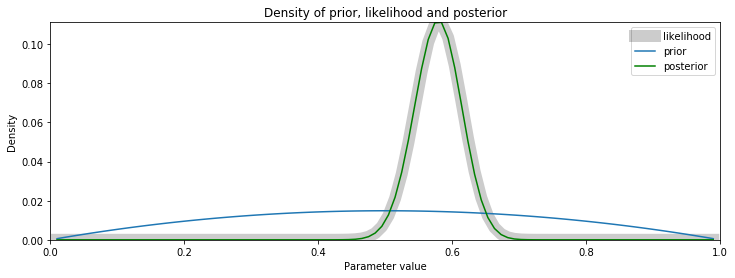

In [179]:
def beta_prior(x, a, b):
    l = scipy.stats.beta.pdf(p, a, b)  # compute likelihood
    return l / l.sum()  # normalize and return

pp = beta_prior(p, 2, 2)
post = posterior(pp, l)
plot_post(pp, l, post, p)